Variance vs. CVaR Comparison

Mauricio Tombini, Jordan Jalving, and Victor M. Zavala 

University of Wisconsin-Madison, 2016

In [29]:
# Loading packages:
using JuMP 
using Distributions 
using Ipopt
using PyPlot

In [30]:
# Generate random data: 
NS = 100
S = collect(1:NS); 
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,NS);

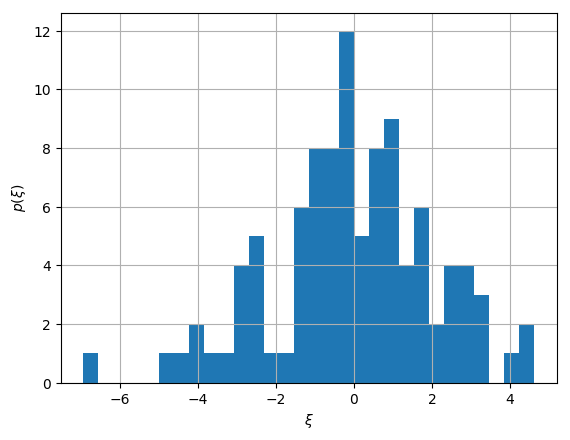

PyObject <matplotlib.text.Text object at 0x7f3f8c9c17d0>

In [31]:
# Plotting data
plt[:hist](R, bins = 30);
grid("on")
xlabel(L"\xi")
ylabel(L"p(\xi)")

## Solve expected value problem

In [32]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)            # decision variable
@variable(m, cost[1:NS])   # per scenario cost
@variable(m, mean)           # mean auxiliary variable
@variable(m, variance)       # variance auxiliary variable

@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2 - R[s]*x) 
@constraint(m, meaneq, mean==(1/NS)*sum(cost[s] for s in S))
@constraint(m,  vareq, variance==(1/NS)*sum((cost[s]-mean)^2 for s in S))
@objective(m, Min, mean)

solve(m)
solcost = getvalue(cost);
println("x=",getvalue(x))
println("mean=",getvalue(mean))
println("variance=",getvalue(variance))  

x=-0.0744614446499047
mean=4.415306281494497
variance=47.43822755872702


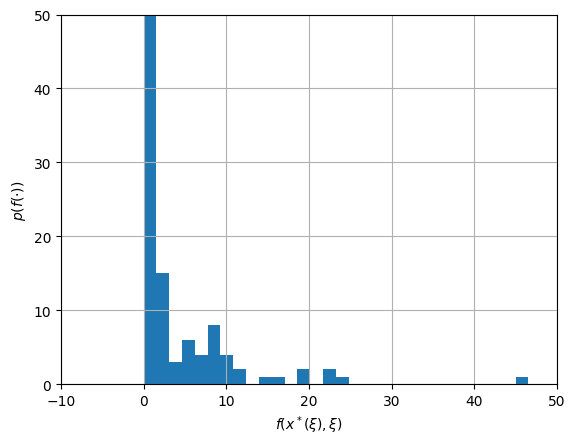

PyObject <matplotlib.text.Text object at 0x7f3f8c098c90>

In [33]:
# Plotting cost fistribution 
plt[:hist](solcost,bins = 30)
grid("on")
axis([-10, 50, 0, 50])
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")

## Solve CVaR Problem

In [34]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)              # decision variable
@variable(m, cost[1:NS])     # per scenario cost
@variable(m, VaR)            # cvar auxiliary variable
@variable(m, phi[S] >= 0)    # cvar auxiliary variable
alpha = 0.0001;              # cvar probability level
@variable(m, mean)           # mean auxiliary variable
@variable(m, variance)       # variance auxiliary variable

@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2 - R[s]*x) 
@constraint(m, cvar[s in S], cost[s]-VaR <= phi[s])
@constraint(m, meaneq, mean==(1/NS)*sum(cost[s] for s in S))
@constraint(m,  vareq, variance==(1/NS)*sum((cost[s]-mean)^2 for s in S))
@objective(m, Min, VaR + (1/NS)*sum((1/alpha)*phi[s] for s in S))

solve(m)
solcost2 = getvalue(cost);
println("x=",getvalue(x))
println("CVaR=",getobjectivevalue(m))
println("mean=",getvalue(mean))
println("variance=",getvalue(variance))                                  

x=-0.7690493397501241
CVaR=32.68240413393139
mean=4.897758625514251
variance=55.73846895822478


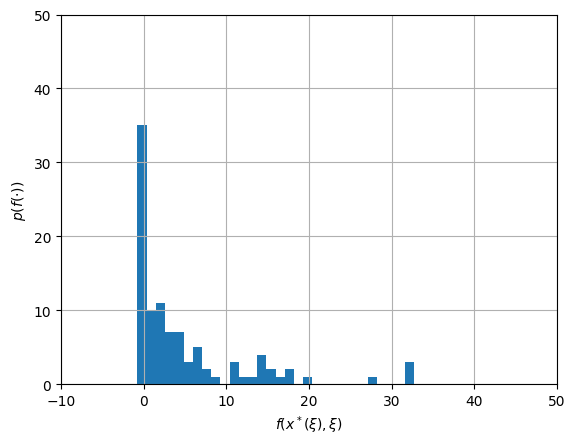

PyObject <matplotlib.text.Text object at 0x7f3f8befff10>

In [35]:
# Plotting cost distribution 
plt[:hist](solcost2,bins = 30)
grid("on")
axis([-10, 50, 0, 50])
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")

## Solve Mean-Variance Problem

In [36]:
m = Model(solver=IpoptSolver(print_level=0))

kappa=100                    # trade-off parameter
@variable(m, x)              # decision variable
@variable(m, cost[1:NS])     # per scenario cost
@variable(m, mean)           # mean auxiliary variable
@variable(m, variance)       # variance auxiliary variable

@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2 - R[s]*x) 
@constraint(m, meaneq, mean==(1/NS)*sum(cost[s] for s in S))
@constraint(m,  vareq, variance==(1/NS)*sum((cost[s]-mean)^2 for s in S))
@objective(m, Min, mean + kappa*variance)

solve(m)
solcost3 = getvalue(cost);
println("x=",getvalue(x))
println("variance=",getvalue(variance))
println("mean=",getvalue(mean))

x=-0.271451419743467
variance=45.89435004281946
mean=4.454111331781856


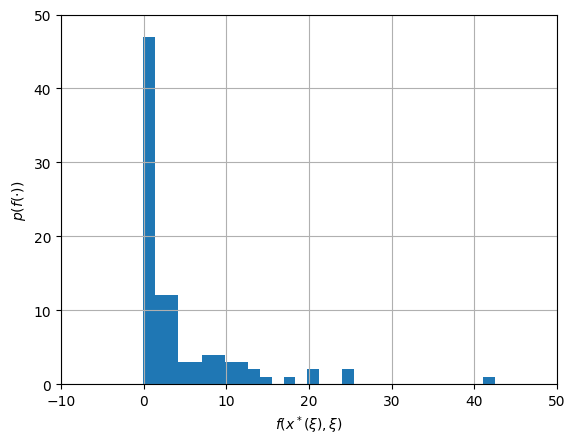

PyObject <matplotlib.text.Text object at 0x7f3f8bd68450>

In [37]:
# Plotting cost distribution 
plt[:hist](solcost3,bins = 30)
grid("on")
axis([-10, 50, 0, 50])
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")